In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="Set2")

In [41]:
df=pd.read_csv('datasets/clean_dataset.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,ssd,hdd,flash,hybrid,Resolution,PPI
0,0,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus,macOS,1.37,71378.6832,128,0,0,0,2560x1600,226.98
1,1,Apple,Ultrabook,13.3,Intel,8.0,Intel HD,macOS,1.34,47895.5232,0,0,128,0,1440x900,127.68
2,2,HP,Notebook,15.6,Intel,8.0,Intel HD,No OS,1.86,30636.0000,256,0,0,0,1920x1080,141.21
3,3,Apple,Ultrabook,15.4,Intel,16.0,AMD Radeon,macOS,1.83,135195.3360,512,0,0,0,2880x1800,220.53
4,4,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus,macOS,1.37,96095.8080,256,0,0,0,2560x1600,226.98


In [42]:
df=df.drop(columns=['Unnamed: 0'],axis=1)


In [43]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,ssd,hdd,flash,hybrid,Resolution,PPI
0,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus,macOS,1.37,71378.6832,128,0,0,0,2560x1600,226.98
1,Apple,Ultrabook,13.3,Intel,8.0,Intel HD,macOS,1.34,47895.5232,0,0,128,0,1440x900,127.68
2,HP,Notebook,15.6,Intel,8.0,Intel HD,No OS,1.86,30636.0000,256,0,0,0,1920x1080,141.21
3,Apple,Ultrabook,15.4,Intel,16.0,AMD Radeon,macOS,1.83,135195.3360,512,0,0,0,2880x1800,220.53
4,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus,macOS,1.37,96095.8080,256,0,0,0,2560x1600,226.98


In [44]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col]=encoder.fit_transform(df[col])

#df = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns, drop_first=False)


In [45]:
df=df.astype(dtype='float')

In [46]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,ssd,hdd,flash,hybrid,Resolution,PPI
0,1.0,4.0,13.3,1.0,8.0,8.0,8.0,1.37,71378.6832,128.0,0.0,0.0,0.0,10.0,226.98
1,1.0,4.0,13.3,1.0,8.0,5.0,8.0,1.34,47895.5232,0.0,0.0,128.0,0.0,1.0,127.68
2,7.0,3.0,15.6,1.0,8.0,5.0,4.0,1.86,30636.0000,256.0,0.0,0.0,0.0,3.0,141.21
3,1.0,4.0,15.4,1.0,16.0,2.0,8.0,1.83,135195.3360,512.0,0.0,0.0,0.0,12.0,220.53
4,1.0,4.0,13.3,1.0,8.0,8.0,8.0,1.37,96095.8080,256.0,0.0,0.0,0.0,10.0,226.98


In [47]:
df.corr()['Price'].sort_values()

TypeName     -0.133683
hdd          -0.075498
flash        -0.037752
hybrid        0.012998
Inches        0.051202
Company       0.133982
Cpu           0.183427
Weight        0.191669
OpSys         0.295271
Gpu           0.391896
PPI           0.474317
Resolution    0.528751
ssd           0.660176
Ram           0.736569
Price         1.000000
Name: Price, dtype: float64

In [48]:
df.corr()['Price'].sort_values().index

Index(['TypeName', 'hdd', 'flash', 'hybrid', 'Inches', 'Company', 'Cpu',
       'Weight', 'OpSys', 'Gpu', 'PPI', 'Resolution', 'ssd', 'Ram', 'Price'],
      dtype='object')

In [49]:
df=df.drop(columns=['hdd', 'flash', 'hybrid', 'Inches'],axis=1)

In [50]:
df.corr()['Price']

Company       0.133982
TypeName     -0.133683
Cpu           0.183427
Ram           0.736569
Gpu           0.391896
OpSys         0.295271
Weight        0.191669
Price         1.000000
ssd           0.660176
Resolution    0.528751
PPI           0.474317
Name: Price, dtype: float64

In [51]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,ssd,Resolution,PPI
0,1.0,4.0,1.0,8.0,8.0,8.0,1.37,71378.6832,128.0,10.0,226.98
1,1.0,4.0,1.0,8.0,5.0,8.0,1.34,47895.5232,0.0,1.0,127.68
2,7.0,3.0,1.0,8.0,5.0,4.0,1.86,30636.0000,256.0,3.0,141.21
3,1.0,4.0,1.0,16.0,2.0,8.0,1.83,135195.3360,512.0,12.0,220.53
4,1.0,4.0,1.0,8.0,8.0,8.0,1.37,96095.8080,256.0,10.0,226.98


In [52]:
ram_list=df['Ram'].value_counts().sort_index().index.to_list()

In [53]:
ram_list

[2.0, 4.0, 6.0, 8.0, 12.0, 16.0, 24.0, 32.0]

In [56]:
ssd_list=df['ssd'].value_counts().sort_index().index.to_list()

In [57]:
ssd_list

[0.0, 8.0, 16.0, 32.0, 64.0, 128.0, 180.0, 256.0, 512.0, 768.0, 1024.0]

In [58]:
df['ssd']=df['ssd'].map(lambda x: ssd_list.index(x)+1 if x in ssd_list else 0)
df['Ram']=df['Ram'].map(lambda x: ram_list.index(x)+1 if x in ram_list else 0)

In [59]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,ssd,Resolution,PPI
0,1.0,4.0,1.0,4,8.0,8.0,1.37,71378.6832,6,10.0,226.98
1,1.0,4.0,1.0,4,5.0,8.0,1.34,47895.5232,1,1.0,127.68
2,7.0,3.0,1.0,4,5.0,4.0,1.86,30636.0000,8,3.0,141.21
3,1.0,4.0,1.0,6,2.0,8.0,1.83,135195.3360,9,12.0,220.53
4,1.0,4.0,1.0,4,8.0,8.0,1.37,96095.8080,8,10.0,226.98


<Axes: >

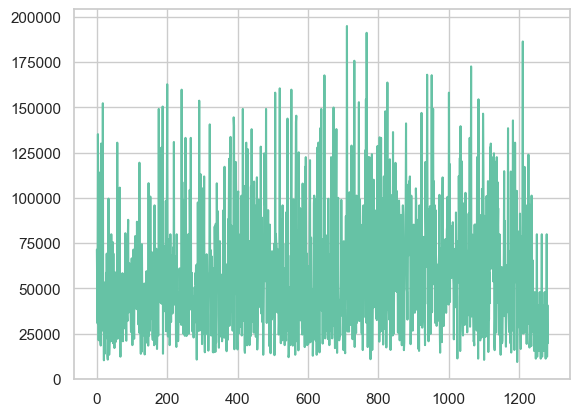

In [60]:
df['Price'].plot(kind='line')

In [61]:
df['Price']=df['Price'].map(lambda x:np.log1p(x)) # np.expm1(y_pred_log)
df['PPI']=df['PPI'].map(lambda x:np.log1p(x)) # np.expm1(y_pred_log)


<Axes: >

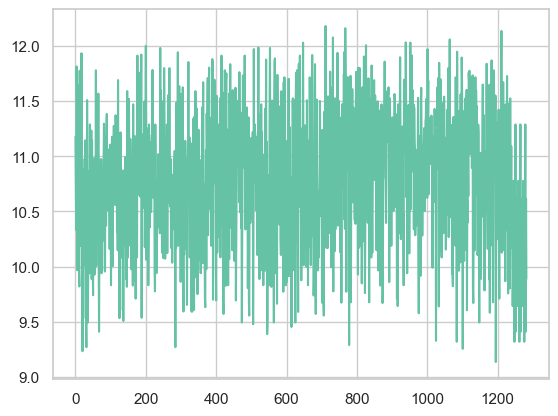

In [62]:
df['Price'].plot(kind='line')

In [63]:
x = df.drop(columns=['Price'])  # Features (all columns except 'price')
y = df['Price']

In [64]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# x=scaler.fit_transform(x)

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [66]:
from sklearn.metrics import r2_score, mean_absolute_error

model = RandomForestRegressor(n_estimators=300,
                              random_state=1,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=20)

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('r2score:',r2_score(y_test,y_pred))
print('Mae:',mean_absolute_error(y_test,y_pred))

r2score: 0.8729433148008909
Mae: 0.17456708641408109


In [67]:
import joblib

# Example: trained model
joblib.dump(model, 'model.pkl')


['model.pkl']

In [72]:
x_train.iloc[0,:]

Company       16.000000
TypeName       3.000000
Cpu            1.000000
Ram            2.000000
Gpu            5.000000
OpSys          5.000000
Weight         1.750000
ssd            6.000000
Resolution     0.000000
PPI            4.726857
Name: 759, dtype: float64

In [76]:
x_test.iloc[1,:].values.reshape(1,-1)

array([[10.        ,  3.        ,  1.        ,  4.        , 12.        ,
         5.        ,  2.6       ,  1.        ,  3.        ,  4.95730484]])

In [77]:
model.predict(x_test.iloc[1,:].values.reshape(1,-1))

array([10.77100823])

In [81]:
type(y_test)

pandas.core.series.Series

In [87]:
y_test.head(2)

1243     9.642053
1245    10.776865
Name: Price, dtype: float64